# Kaggle-Titanic-Python

                                                               Project work submitted by:
                                                                               - Phaneendra Garakapathy


## [TABLE OF CONTENTS](#Table-of-contents)

1. [INTRODUCTION](#INTRODUCTION)

2. [THE PROBLEM DOMAIN](#THE-PROBLEM-DOMAIN)

3. [DATA DICTIONARY](#DATA-DICTIONARY)

4. [METRIC FOR SUCESS](#METRIC-FOR-SUCESS)

5. [USED LIBRARIES](#USED-LIBRARIES)

6. [EXPLORATION DATA ANALYSIS](#EXPLORATION-DATA-ANALYSIS)

7. [DATA CLEANING](#DATA-CLEANING)

8. [K-NEAREST NEIGHBOUR ALGORITHM](#K-NEAREST-NEIGHBOUR-ALGORITHM)

9. [FINE TUNING KNN ALGORITHM](#FINE-TUNING-KNN-ALGORITHM)

10. [PREDICTING ON THE TEST DATASET](#PREDICTING-ON-THE-TEST-DATASET)

11. [CONCLUSION](#CONCLUSION)

12. [EFFORT OF EACH TEAM MEMBER](#EFFORT-OF-EACH-TEAM-MEMBER)

## INTRODUCTION

[[ go back to the top ]](#Table-of-contents)

**Titanic Dataset Overview: **

The data given to us were split into two groups:

        training set (train.csv)
        test set (test.csv)

We used the training set to build your machine learning models. For the training set, we provide the outcome for each passenger. Our model was based on “features” like passengers’ gender and class.

Afterwards we used the test set to see how well your model performs on unseen data. For each passenger in the test set, we used our model to predict whether or not they will survive the sinking of the Titanic tragedy.


## THE PROBLEM DOMAIN

[[ go back to the top ]](#Table-of-contents)
 
The sinking of the Titanic ship is one of the most infamous shipwrecks in history. This tragedy shocked the people globally and led to many new safety regulations for ships.

One reasons that this incidence which led to so many loss of life was that there were not enough lifeboats for the passengers and the crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In the end we will identify the passengers in our test set who would survive the tragedy based on the given factors alone.


### *Titanic Incidence*
<img src="http://www.titanicuniverse.com/wp-content/uploads/2009/12/titanic-disaster-300x244.jpg" />


## DATA DICTIONARY

[[ go back to the top ]](#Table-of-contents)

**survival::**	    Survival	
**pclass::** 	    Ticket class	
**sex::**	        Sex	
**Age::**		    Age in years	
**sibsp::**		    Number of siblings / spouses aboard the Titanic	
**parch::**		    Number of parents / children aboard the Titanic	
**ticket::**		Ticket number	
**fare::**		    Passenger fare	
**cabin::**		    Cabin number	
**embarked::**		Port of Embarkation

## METRIC FOR SUCESS 

[[ go back to the top ]](#Table-of-contents)

Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly predicted survival — to quantify how well our model is performing. Based on the quality of data and preliminary baseline models we should try to achieve at least 75% accuracy.

## USED LIBRARIES

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

**Importing the libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb

D:\software\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EXPLORATION DATA ANALYSIS

[[ go back to the top ]](#Table-of-contents)

Let's look at the data we're working with. It's vital that we spot any data errors before investing too much time in our analysis.

We are looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [2]:
# Reading our dataset
dataset = pd.read_csv('Data/train.csv',index_col = 0)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**One of the first things we should look for is missing data.**

In [3]:
dataset = pd.read_csv('Data/train.csv',index_col = 0, na_values=['NA',''])

Now pandas knows to treat rows with 'NA' as missing values.

Next, we will look at the distribution of our data — especially the outliers.
We will start by printing out some summary statistics about the data set.

In [4]:
dataset.shape

(891, 11)

In [5]:
dataset.head(1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 11 columns):
Survived    1 non-null int64
Pclass      1 non-null int64
Name        1 non-null object
Sex         1 non-null object
Age         1 non-null float64
SibSp       1 non-null int64
Parch       1 non-null int64
Ticket      1 non-null object
Fare        1 non-null float64
Cabin       0 non-null object
Embarked    1 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 96.0+ bytes


In [6]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

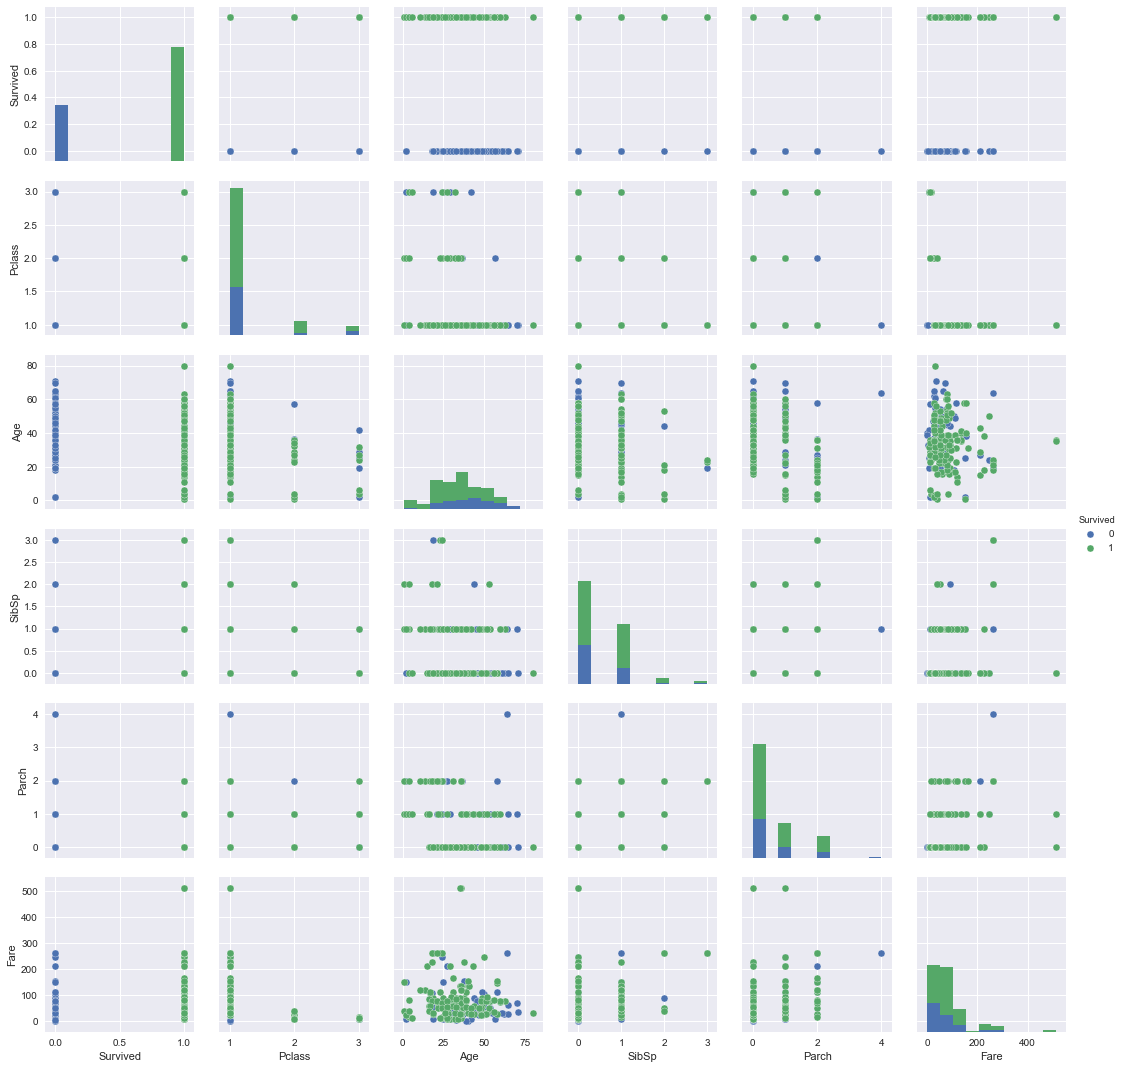

In [8]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(dataset.dropna(), hue='Survived')

From the scatterplot matrix, we can already see some issues with the data set:

1. There are some clear patterns in the measurements that may be erroneous.
2. We had to drop or Impute those rows with missing values such as in Age or Embarked.

In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step...

**Let's check for various parameters.** 

**Parameter: SEX**

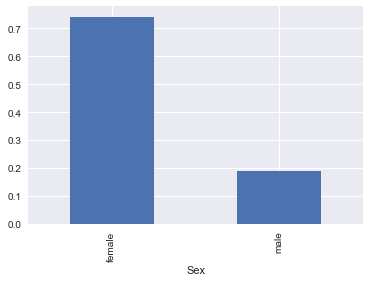

In [9]:
dataset.groupby('Sex').Survived.mean().plot(kind='bar')
plt.show()

**As we can see form the graph that the female survival is way more than males so we consider sex is one of the important parameter. So let's include it as an input feature (x variable) for our analysis.**

**Parameter: AGE**

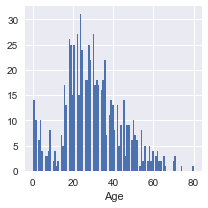

In [10]:
g = sb.FacetGrid(dataset)
g.map(plt.hist, 'Age', bins=100)

**The distribution of "Age" column looks Normally distributed. Lets see how it looks with "Survival" status.**

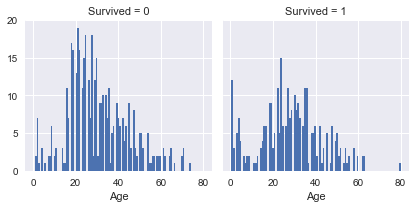

In [11]:
g = sb.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=100)

In [12]:
dataset.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**As we can see there are 177 missing values for age and we took age as one of the x variables so we will impute it in later steps.**

**Parameter: Fare**

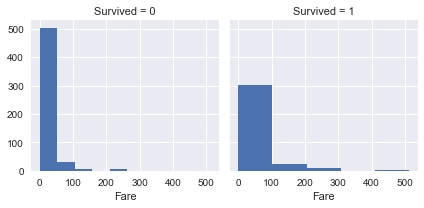

In [13]:
g = sb.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

**As we can see most of the passenger payed lower fare than 100. We can also interpret from the second graph that the survival chances increases as the fare prices increases.**

**Parameter: Pclass**

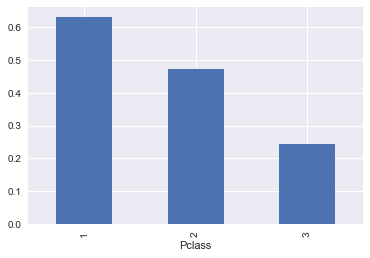

In [14]:
dataset.groupby('Pclass').Survived.mean().plot(kind='bar')
plt.show()

**Of course the higher class people will have the higher survival rate and we can see it clearly from the above graph.**

**Parameter: SibSp**

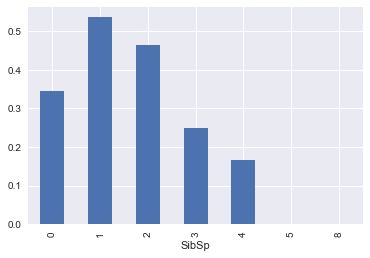

In [15]:
dataset.groupby('SibSp').Survived.mean().plot(kind='bar')
plt.show()

**Some interesting fact we came across in the above graph that with more siblings the survival rate decreases.**

## DATA CLEANING

[[ go back to the top ]](#Table-of-contents)

Based on this we can see that most of the columns does not have any empty values except AGE, Cabin, Embarked.
1. **Embarked:** Since we have just 2 missing values we can just remove these 2 records since 2<< 891 records.
2. **Age:** We need to impute these values since we have many (177) missing values and so can't be ignored or removed.
3. **Cabin:** We are not considering this field in our models so this can be ignored.

**We are encoding sex as 0 or 1 for computation.**

In [16]:
mapping_sex = {'female':1, 'male':0}
dataset.replace({'Sex':mapping_sex}, inplace = True)

In [17]:
dataset = dataset[dataset['Embarked'].notnull()]

**Dummy variable treatment:**

In [18]:
mapping_embarked = {'Q':'Queenstown', "S":'Southampton', "C":'Cherbourg'}
for elem in dataset['Embarked'].unique():
    dataset[mapping_embarked[elem]] = dataset['Embarked'] == elem

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Data Imputation for the variable age:**

In [19]:
dataset['Age'] = dataset.Age.round()

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Next let's see the Corelation among variables for Age.**

In [20]:
dataset.corr().Age

Survived      -0.082059
Pclass        -0.366358
Sex           -0.098947
Age            1.000000
SibSp         -0.307109
Parch         -0.187822
Fare           0.093364
Southampton   -0.025086
Cherbourg      0.038234
Queenstown    -0.022363
Name: Age, dtype: float64

**Step: Data Imputation**

[[ go back to the top ]](#Table-of-contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

In [21]:
X_train_age = dataset[dataset.Age.notnull()][['Pclass','SibSp','Parch']]
X_test_age = dataset[dataset.Age.isnull()][['Pclass','SibSp','Parch']]
y_age = dataset.Age.dropna()

It's not ideal that we had to drop those rows, especially considering they're so many entries. Since there are so many rows with missing age value removing them could potentially bias our analysis.

One way to deal with missing data is **imputation by DecisionTreeClassifier method**.

we will can do that next.

In [22]:
dtree_age = DecisionTreeClassifier()
dtree_age.fit(X_train_age, y_age)
prediction = dtree_age.predict(X_test_age)
agePrediction = pd.DataFrame(data=prediction,index=X_test_age.index.values,columns=['Age'])
dataset = dataset.combine_first(agePrediction)

**Now let's see if we have any missing values in our dataset for variable Age after imputation:**

In [23]:
dataset.Age.isnull().sum()

0

**Step: Feature Scaling**

Now let's try to improve the model using **feature scaling** approach using Min-Max Normalization.

In [24]:
##feature scaling - Age
dataset[dataset.Age == dataset.Age.max()]

,Age,Cabin,Cherbourg,Embarked,Fare,Name,Parch,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket
631,80.0,A23,False,S,30.0,"Barkworth, Mr. Algernon Henry Wilson",0,1,False,0,0,True,1,27042


**Strangely this 80 year old Male has survived!!**

In [25]:
dataset[dataset.Age == dataset.Age.min()]

,Age,Cabin,Cherbourg,Embarked,Fare,Name,Parch,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket
804,0.0,NaN,True,C,8.5167,"Thomas, Master. Assad Alexander",1,3,False,0,0,False,1,2625


In [26]:
dataset.Age.mean()

28.012373453318336

In [27]:
age_min = dataset.Age.min()
age_max = dataset.Age.max()

In [28]:
dataset["Age_norm"] = ((dataset.Age - age_min) / (age_max - age_min))

In [29]:
dataset.head()

,Age,Cabin,Cherbourg,Embarked,Fare,Name,Parch,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket,Age_norm
1,22.0,NaN,False,S,7.2500,"Braund, Mr. Owen Harris",0,3,False,0,1,True,0,A/5 21171,0.2750
2,38.0,C85,True,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,False,1,1,False,1,PC 17599,0.4750
3,26.0,NaN,False,S,7.9250,"Heikkinen, Miss. Laina",0,3,False,1,0,True,1,STON/O2. 3101282,0.3250
4,35.0,C123,False,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,False,1,1,True,1,113803,0.4375
5,35.0,NaN,False,S,8.0500,"Allen, Mr. William Henry",0,3,False,0,0,True,0,373450,0.4375


In [30]:
##feature scaling - Fare
dataset[dataset.Fare == dataset.Fare.max()]

,Age,Cabin,Cherbourg,Embarked,Fare,Name,Parch,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket,Age_norm
259,35.0,NaN,True,C,512.3292,"Ward, Miss. Anna",0,1,False,1,0,False,1,PC 17755,0.4375
680,36.0,B51 B53 B55,True,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,False,0,0,False,1,PC 17755,0.4500
738,35.0,B101,True,C,512.3292,"Lesurer, Mr. Gustave J",0,1,False,0,0,False,1,PC 17755,0.4375


In [31]:
##feature scaling - Fare
dataset[dataset.Fare == dataset.Fare.min()]

,Age,Cabin,Cherbourg,Embarked,Fare,Name,Parch,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket,Age_norm
180,36.0,NaN,False,S,0.0,"Leonard, Mr. Lionel",0,3,False,0,0,True,0,LINE,0.4500
264,40.0,B94,False,S,0.0,"Harrison, Mr. William",0,1,False,0,0,True,0,112059,0.5000
272,25.0,NaN,False,S,0.0,"Tornquist, Mr. William Henry",0,3,False,0,0,True,1,LINE,0.3125
278,23.0,NaN,False,S,0.0,"Parkes, Mr. Francis ""Frank""",0,2,False,0,0,True,0,239853,0.2875
303,19.0,NaN,False,S,0.0,"Johnson, Mr. William Cahoone Jr",0,3,False,0,0,True,0,LINE,0.2375
414,23.0,NaN,False,S,0.0,"Cunningham, Mr. Alfred Fleming",0,2,False,0,0,True,0,239853,0.2875
467,23.0,NaN,False,S,0.0,"Campbell, Mr. William",0,2,False,0,0,True,0,239853,0.2875
482,23.0,NaN,False,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,2,False,0,0,True,0,239854,0.2875
598,49.0,NaN,False,S,0.0,"Johnson, Mr. Alfred",0,3,False,0,0,True,0,LINE,0.6125
634,30.0,NaN,False,S,0.0,"Parr, Mr. William Henry Marsh",0,1,False,0,0,True,0,112052,0.3750


In [32]:
Fare_min = dataset.Fare.min()
Fare_max = dataset.Fare.max()

In [33]:
dataset["Fare_norm"] = ((dataset.Fare - Fare_min) / (Fare_max - Fare_min))

In [34]:
dataset.Fare_norm.mean()

0.06264854877955495

In [35]:
dataset

,Age,Cabin,Cherbourg,Embarked,Fare,Name,Parch,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket,Age_norm,Fare_norm
1,22.0,NaN,False,S,7.2500,"Braund, Mr. Owen Harris",0,3,False,0,1,True,0,A/5 21171,0.2750,0.014151
2,38.0,C85,True,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,False,1,1,False,1,PC 17599,0.4750,0.139136
3,26.0,NaN,False,S,7.9250,"Heikkinen, Miss. Laina",0,3,False,1,0,True,1,STON/O2. 3101282,0.3250,0.015469
4,35.0,C123,False,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,False,1,1,True,1,113803,0.4375,0.103644
5,35.0,NaN,False,S,8.0500,"Allen, Mr. William Henry",0,3,False,0,0,True,0,373450,0.4375,0.015713
6,22.0,NaN,False,Q,8.4583,"Moran, Mr. James",0,3,True,0,0,False,0,330877,0.2750,0.016510
7,54.0,E46,False,S,51.8625,"McCarthy, Mr. Timothy J",0,1,False,0,0,True,0,17463,0.6750,0.101229
8,2.0,NaN,False,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,False,0,3,True,0,349909,0.0250,0.041136
9,27.0,NaN,False,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,False,1,0,True,1,347742,0.3375,0.021731
10,14.0,NaN,True,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,False,1,1,False,1,237736,0.1750,0.058694


**Now the variable selection is finalized.**

In [36]:
X_list_col_selected = ["Parch","Pclass","Queenstown","Sex","SibSp","Southampton","Age_norm","Fare_norm"]
y_list_col_selected = ["Survived"]

In [37]:
X = dataset.loc[:, X_list_col_selected]
y = dataset.loc[:, y_list_col_selected]

# K-NEAREST NEIGHBOUR ALGORITHM

[[ go back to the top ]](#Table-of-contents)

<img src="https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg" />

We are using KNN as our classification model. The output in KNN is computed as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

Class probabilities can be calculated as the normalized frequency of samples that belong to each class in the set of K most similar instances for a new data instance. For example, in a binary classification problem (class is 0 or 1):

p(class=0) = count(class=0) / (count(class=0)+count(class=1))

If you are using K and you have an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

Ties can be broken consistently by expanding K by 1 and looking at the class of the next most similar instance in the training dataset.


# FINE TUNING KNN ALGORITHM

[[ go back to the top ]](#Table-of-contents)

**Now it's time to choose our split size and K value to be taken for our KNN clustering model.**

For this we will be running various iteration for K values, Split size of the train and test data.

In [38]:
split_size = [0.4,0.3,0.25,0.2,0.15]
rand = range(0,10)
scores = []
final_table = []

for i in split_size:
    for j in rand:
    # Splitting the dataset into the Training set and Test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = j)
        k_range = range(1,10)


        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(X_train, y_train)
            temp = []
            sc = knn.score(X_test, y_test)
            temp.append(i)
            temp.append(j)
            temp.append(k)
            temp.append(sc)
            #temp_str = str(i)+"-"+str(j)+"-"+str(k)+"-"+str(sc)
            scores.append(temp)
        final_table = pd.DataFrame(scores,columns= ["split","random_state","k_value","score"])

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [39]:
final_table.head()

,split,random_state,k_value,score
0,0.4,0,1,0.719101
1,0.4,0,2,0.769663
2,0.4,0,3,0.755618
3,0.4,0,4,0.772472
4,0.4,0,5,0.766854


In [40]:
final_table.columns

Index(['split', 'random_state', 'k_value', 'score'], dtype='object')

In [41]:
kvalue_score = pd.DataFrame(final_table.groupby(["k_value"])['score'].mean(),columns =["score"])
kvalue_score.reset_index(inplace=True)
kvalue_score

,k_value,score
0,1,0.754191
1,2,0.773285
2,3,0.796130
3,4,0.792434
4,5,0.785582
5,6,0.787694
6,7,0.789708
7,8,0.792592
8,9,0.794638


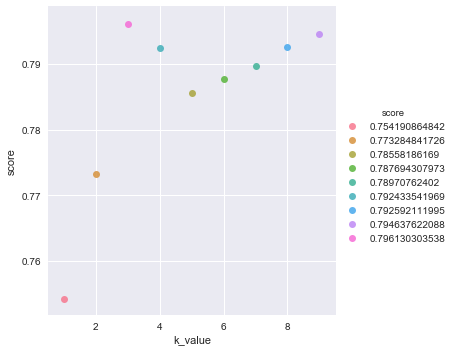

In [42]:
sb.lmplot('k_value','score', data=kvalue_score , fit_reg=False, hue="score" )

** Looking at the scatter plot we can see that the average accouracy score for K=3 is highest hence we choose K value to be 3**

In [43]:
final_table.groupby(["k_value","split"])['score'].mean()

k_value  split
1        0.15     0.749254
         0.20     0.758989
         0.25     0.751570
         0.30     0.753558
         0.40     0.757584
2        0.15     0.766418
         0.20     0.777528
         0.25     0.772197
         0.30     0.777528
         0.40     0.772753
3        0.15     0.791045
         0.20     0.803933
         0.25     0.800000
         0.30     0.796629
         0.40     0.789045
4        0.15     0.782836
         0.20     0.792135
         0.25     0.797309
         0.30     0.794382
         0.40     0.795506
5        0.15     0.769403
         0.20     0.785393
         0.25     0.789686
         0.30     0.788764
         0.40     0.794663
6        0.15     0.776866
         0.20     0.785955
         0.25     0.793722
         0.30     0.788390
         0.40     0.793539
7        0.15     0.774627
         0.20     0.788202
         0.25     0.792825
         0.30     0.796255
         0.40     0.796629
8        0.15     0.779104
         0.20

** Looking at the scores for K = 3 we can see that the average accuracy for split size = 0.25 is highest so we will take split of test size to be 0.25 and train as 0.75.**

In [44]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

**RUNNING THE KNN MODEL WITH k=3 AND TEST SIZE = 0.25**

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

**Predicting the accuracy for train and test dataset:**

In [46]:
knn.score(X_train, y_train)

0.86486486486486491

**Interpreting score = 0.8648 : **
As per our KNN model on train dataset we were able to predict the survival of passengers 86.34% of the time if "No. of parents of the passenger", "Ticket Class of passenger","Port of embarkation","Sex of the passenger","No. of Siblings of passenger","Age of passenger","Fare of the ticket" parameters are given.

In [47]:
knn.score(X_test, y_test)

0.8340807174887892

**Interpreting score = 0.8340 : **
As per our KNN model on test dataset we were able to predict the survival of passengers 86.34% of the time if "No. of parents of the passenger", "Ticket Class of passenger","Port of embarkation","Sex of the passenger","No. of Siblings of passenger","Age of passenger","Fare of the ticket" parameters are given.

# PREDICTING ON THE TEST DATASET

[[ go back to the top ]](#Table-of-contents)


**Test data preparation:**

    -read the test data
    -impute the age
    -sacling age 
    -scaling fare

In [48]:
test_dataset = pd.read_csv('Data/test.csv')

In [49]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
test_dataset.replace({'Sex':mapping_sex}, inplace = True)

In [51]:
for elem in test_dataset['Embarked'].unique():
    test_dataset[mapping_embarked[elem]] = test_dataset['Embarked'] == elem

In [52]:
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].mean())

In [53]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Queenstown       0
Southampton      0
Cherbourg        0
dtype: int64

In [54]:
test_dataset['Age'] = test_dataset.Age.round()

In [55]:
X_test_age = test_dataset[test_dataset.Age.isnull()][['Pclass','SibSp','Parch']]
y_age = test_dataset.Age.dropna()

In [56]:
prediction = dtree_age.predict(X_test_age)
agePrediction = pd.DataFrame(data=prediction,index=X_test_age.index.values,columns=['Age'])
test_dataset = test_dataset.combine_first(agePrediction)

In [57]:
test_dataset.isnull().sum()

Age              0
Cabin          327
Cherbourg        0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Queenstown       0
Sex              0
SibSp            0
Southampton      0
Ticket           0
dtype: int64

In [58]:
test_dataset["Age_norm"] = ((test_dataset.Age - age_min) / (age_max - age_min))

In [59]:
test_dataset["Fare_norm"] = ((test_dataset.Fare - Fare_min) / (Fare_max - Fare_min))

In [60]:
X_list_col_selected = ["Parch","Pclass","Queenstown","Sex","SibSp","Southampton","Age_norm","Fare_norm"]

In [61]:
X_test_dataset = test_dataset.loc[:, X_list_col_selected]

In [62]:
prediction = knn.predict(X_test_dataset)

In [63]:
prediction = knn.predict(X_test_dataset)
finalPrediction = pd.DataFrame(data=prediction,index=X_test_dataset.index.values,columns=['Survived'])
test_dataset = test_dataset.combine_first(finalPrediction)

In [64]:
test_dataset.columns

Index(['Age', 'Age_norm', 'Cabin', 'Cherbourg', 'Embarked', 'Fare',
       'Fare_norm', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Queenstown',
       'Sex', 'SibSp', 'Southampton', 'Survived', 'Ticket'],
      dtype='object')

**Let's save the final result into a csv file.**

In [65]:
final_result = test_dataset[['PassengerId', 'Survived']].copy()
final_result["Survived"] = final_result.Survived.astype(int)
final_result.to_csv("titanic_results.csv",index=False)

## CONCLUSION

[[ go back to the top ]](#Table-of-contents)

Now I realize that why data scientist used to spend most of their time into feature engineering and exploratory analysis compare to actual model building. Model that we are using is definitely important, however more than that understanding our data and feature engineering is crucial.

